In [3]:
"""
FROM EDA
1. Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)

In [4]:
# FROM EDA 2.4 Load ALL data
train_all = pd.read_csv('../Data/subsetted/train_all.csv', sep=',', engine='python')

# Load all training data
train_data_all = pd.read_csv('..\Data\subsetted\subsetted_training_data_all.csv', sep=',', engine='python')
print('Subsetted data done')

Subsetted data done


In [19]:
# FROM EDA 3. Check the data

# 3.1 Data shape
# Check the shape of the train data
print("Train data shape:", train_all.shape, "Subsetted train data shape:", train_data_all.shape)

# 3.2 Descriptive stats of train data
# Descriptive statistics of train data
train_data_all.describe()

Train data shape: (167888, 3) Subsetted train data shape: (167888, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,1.678880e+05,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,1272.0,...,165.000000,166828.000000,38169.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,4683.000000,1.670020e+05
mean,1.299536e+07,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,66.0,...,271.260606,1968.569311,1.437764,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,13.827247,6.049390e+13
std,3.016071e+06,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,0.0,...,293.611447,23.777202,0.544508,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,2.421658,1.054137e+12
min,1.071174e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,...,12.000000,1824.000000,1.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,3.000000,6.037101e+13
25%,1.154899e+07,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,66.0,...,88.000000,1953.000000,1.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,13.000000,6.037312e+13
50%,1.254060e+07,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,...,160.000000,1970.000000,1.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,14.000000,6.037604e+13
75%,1.421930e+07,1.000000,7.000000,819.000000,3.000000,4.000000,4.000000,7.000000,3.000000,66.0,...,320.000000,1987.000000,2.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,15.000000,6.059042e+13
max,1.676893e+08,13.000000,21.000000,3560.000000,20.000000,16.000000,4.000000,12.000000,20.000000,66.0,...,1366.000000,2016.000000,6.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,99.000000,4.830301e+14


In [ ]:
# FROM EDA 3.3 Variables types
# Print the type of each variable

print("ALL DATA TYPES")
print(train_data_all.dtypes)

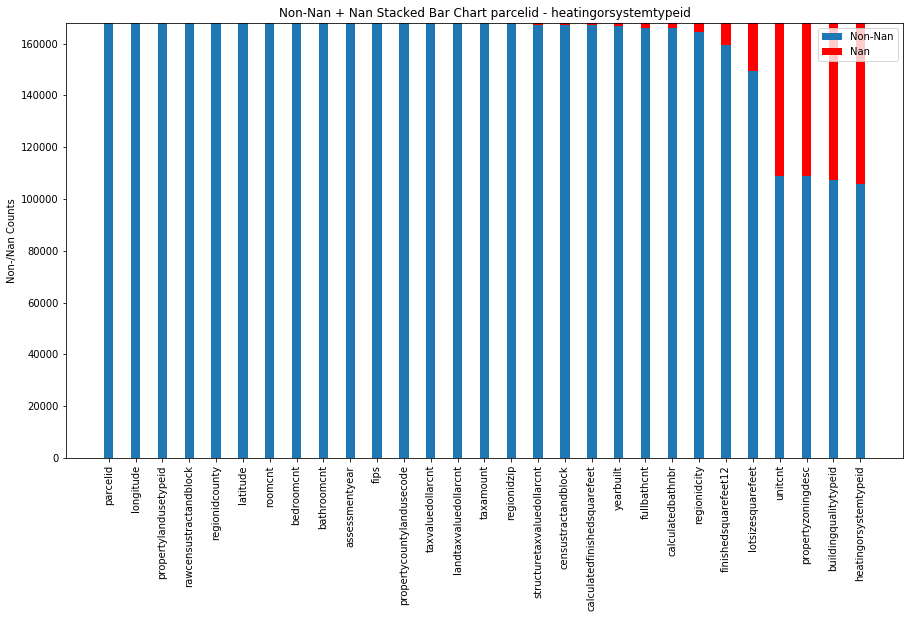

In [37]:
# Null Counts

# Non-null counts
#train_data_all.info()

nan_counts = train_data_all.isnull().sum()
non_nan_counts = train_data_all.notna().sum()

counts = pd.concat([non_nan_counts, nan_counts], axis=1, join='inner')
counts.columns = ['non_nan', 'nan']
counts = counts.sort_values(by=['nan'])

N = counts.shape[0]
n2 = int(N/2)
width = .35       # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(15,8))
ind = np.arange(1, N+1)

non_nan_bar = ax.bar(ind[:n2], counts.non_nan[:n2], width)
nan_bar = ax.bar(ind[:n2], counts.nan[:n2], width,  color='r', bottom=counts.non_nan[:n2])
ax.set_xticks(ind[:n2])
ax.set_xticklabels(counts.index.values[:n2], rotation='vertical')
ax.set_ylabel('Non-/Nan Counts')
ax.set_title('Non-Nan + Nan Stacked Bar Chart %s - %s' %(counts.index.values[0], counts.index.values[n2-1]))
ax.legend((non_nan_bar[0], nan_bar[0]), ('Non-Nan', 'Nan'))

In [51]:
# Descriptives for above features

rows = counts.index.values[:n2]
cols = ['Nan', 'Non-Nan', '% Nan']

desc = []

for r in rows:
    print("%s:" %r)
    print("\tNan:     %i" %counts.nan[r])
    print("\tNon-Nan: %i" %counts.non_nan[r])
    print("\t%% Nan:   %.2f%%" %(counts.nan[r]/(counts.nan[r] + counts.non_nan[r])*100))
    

parcelid:
	Nan:     0
	Non-Nan: 167888
	% Nan:   0.00%
longitude:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
propertylandusetypeid:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
rawcensustractandblock:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
regionidcounty:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
latitude:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
roomcnt:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
bedroomcnt:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
bathroomcnt:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
assessmentyear:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
fips:
	Nan:     34
	Non-Nan: 167854
	% Nan:   0.02%
propertycountylandusecode:
	Nan:     35
	Non-Nan: 167853
	% Nan:   0.02%
taxvaluedollarcnt:
	Nan:     36
	Non-Nan: 167852
	% Nan:   0.02%
landtaxvaluedollarcnt:
	Nan:     37
	Non-Nan: 167851
	% Nan:   0.02%
taxamount:
	Nan:     45
	Non-Nan: 167843
	% Nan:   0.03%
regionidzip:
	Nan:     119
	Non-Nan: 167769
	% Nan:   0.07%
structuretaxvaluedoll

['regionidneighborhood' 'garagecarcnt' 'garagetotalsqft'
 'airconditioningtypeid' 'numberofstories' 'poolcnt' 'pooltypeid7'
 'threequarterbathnbr' 'fireplacecnt' 'finishedfloor1squarefeet'
 'finishedsquarefeet50' 'finishedsquarefeet15' 'yardbuildingsqft17'
 'taxdelinquencyflag' 'taxdelinquencyyear' 'hashottuborspa' 'pooltypeid2'
 'poolsizesum' 'pooltypeid10' 'decktypeid' 'finishedsquarefeet6'
 'typeconstructiontypeid' 'architecturalstyletypeid' 'fireplaceflag'
 'yardbuildingsqft26' 'basementsqft' 'storytypeid' 'finishedsquarefeet13'
 'buildingclasstypeid']


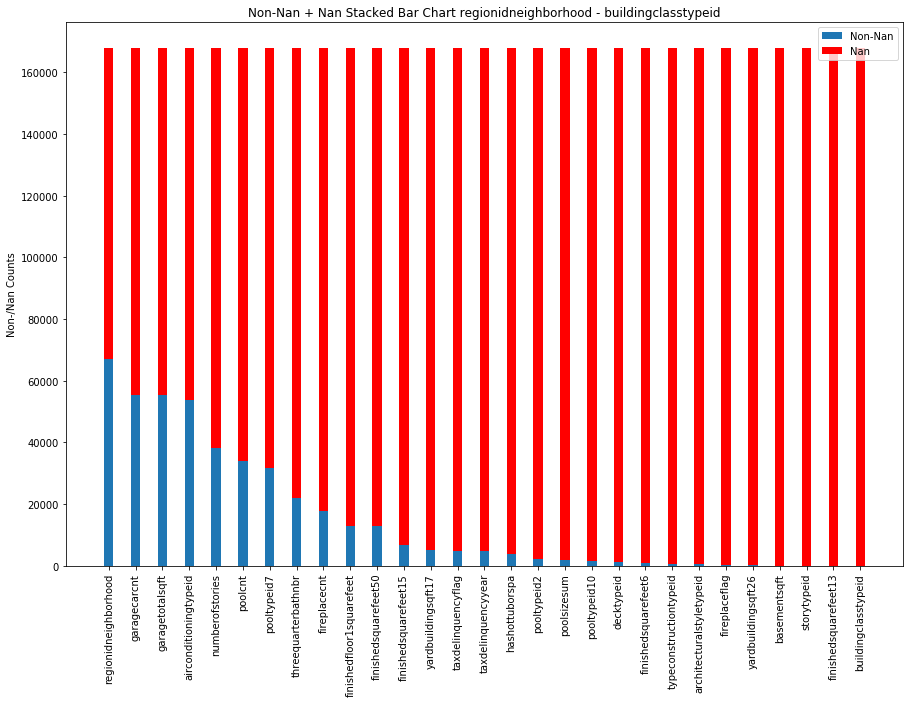

In [112]:
print(counts.index.values[n2:])

fig, ax = plt.subplots(figsize=(15,10))
ind = np.arange(1, N+1)

width = .35       # the width of the bars: can also be len(x) sequence

non_nan_bar = ax.bar(ind[n2:], counts.non_nan[n2:], width)
nan_bar = ax.bar(ind[n2:], counts.nan[n2:], width,  color='r', bottom=counts.non_nan[n2:])
ax.set_xticks(ind[n2:])
ax.set_xticklabels(counts.index.values[n2:], rotation='vertical')
ax.set_ylabel('Non-/Nan Counts')
ax.set_title('Non-Nan + Nan Stacked Bar Chart %s - %s' %(counts.index.values[n2], counts.index.values[N-1]))
ax.legend((non_nan_bar[0], nan_bar[0]), ('Non-Nan', 'Nan'))
plt.show()

In [52]:
# Descriptives for above features

rows = counts.index.values[n2:]
cols = ['Nan', 'Non-Nan', '% Nan']

desc = []

for r in rows:
    print("%s:" %r)
    print("\tNan:     %i" %counts.nan[r])
    print("\tNon-Nan: %i" %counts.non_nan[r])
    print("\t%% Nan:   %.2f%%" %(counts.nan[r]/(counts.nan[r] + counts.non_nan[r])*100))

regionidneighborhood:
	Nan:     100902
	Non-Nan: 66986
	% Nan:   60.10%
garagecarcnt:
	Nan:     112431
	Non-Nan: 55457
	% Nan:   66.97%
garagetotalsqft:
	Nan:     112431
	Non-Nan: 55457
	% Nan:   66.97%
airconditioningtypeid:
	Nan:     114100
	Non-Nan: 53788
	% Nan:   67.96%
numberofstories:
	Nan:     129719
	Non-Nan: 38169
	% Nan:   77.27%
poolcnt:
	Nan:     133813
	Non-Nan: 34075
	% Nan:   79.70%
pooltypeid7:
	Nan:     136112
	Non-Nan: 31776
	% Nan:   81.07%
threequarterbathnbr:
	Nan:     145773
	Non-Nan: 22115
	% Nan:   86.83%
fireplacecnt:
	Nan:     149992
	Non-Nan: 17896
	% Nan:   89.34%
finishedfloor1squarefeet:
	Nan:     154995
	Non-Nan: 12893
	% Nan:   92.32%
finishedsquarefeet50:
	Nan:     154995
	Non-Nan: 12893
	% Nan:   92.32%
finishedsquarefeet15:
	Nan:     161297
	Non-Nan: 6591
	% Nan:   96.07%
yardbuildingsqft17:
	Nan:     162849
	Non-Nan: 5039
	% Nan:   97.00%
taxdelinquencyflag:
	Nan:     163205
	Non-Nan: 4683
	% Nan:   97.21%
taxdelinquencyyear:
	Nan:     163205
	Non-N

# Thoughts

So there are two big leaps, one from 10% to 35% and one from 36% to 60%. 

We could replace the Nans with some other value. The fact that the data is missing in these places may give us important information.

In [2]:
# FROM EDA 4. Prep the data

# 4.1 Test Subsetting
# Testing - keep only int or float columns, to just initially test algorithms before doing any additional data manipulation
temp_data = train_data_all.select_dtypes(['float64','int64'])

# Check Variable types
print("\nINT AND FLOAT ONLY DATA")
print(temp_data.dtypes)

NameError: name 'train_data_all' is not defined